# PCA (Principal Compoonent Analysis)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### iris dataset 활용

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

### 1) Numpy로 구하기

In [7]:
# 공분산 행렬
iris_cov = np.dot(iris_std.T, iris_std) / (len(iris_std) - 1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [8]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
# 고유값, 고유벡터 구하기
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [14]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [15]:
# 주성분 PC1
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1,1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [16]:
PC1 = np.dot(iris_std, eig_vecs[:,0:1])
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [17]:
PC2 = np.dot(iris_std, eig_vecs[:,1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [18]:
PC1.shape, PC2.shape

((150, 1), (150, 1))

In [19]:
iris_PCA = pd.DataFrame({
    'PC1': PC1.reshape(-1,),
    'PC2': PC2.reshape(-1,),
    'species': iris.target
})
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


### 2) Scikit-Learn으로 구하기

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [23]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [24]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### 데이터 시각화

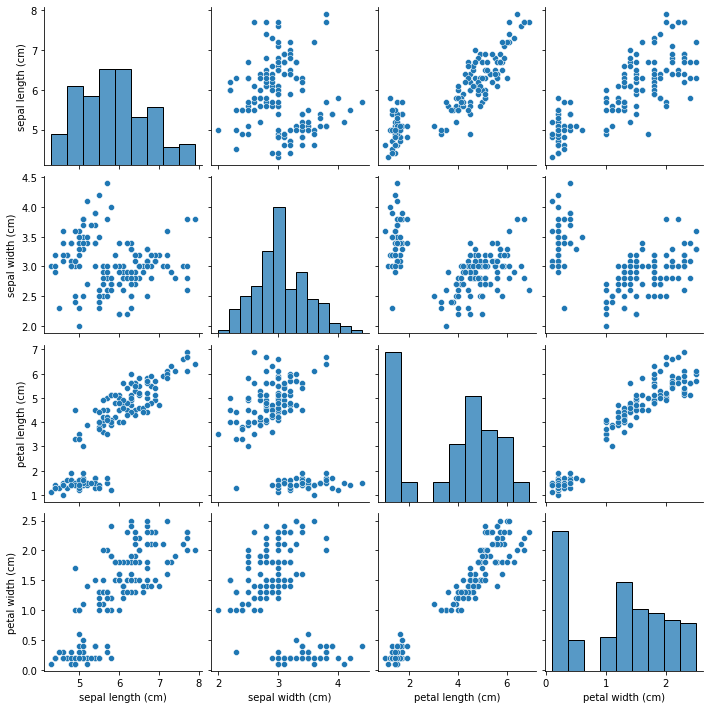

In [26]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
sns.pairplot(iris_df);

- Sepal Length와 Sepal Width와의 관계

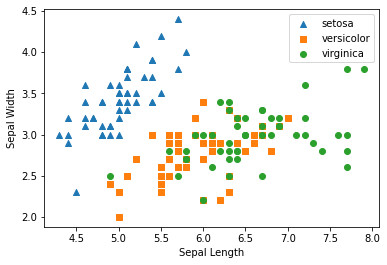

In [27]:
iris_df['species'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.species == i]['sepal length (cm)']
    y_axis_data = iris_df[iris_df.species == i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

- PCA 변환 후 시각화 

In [29]:
iris_pca_df['species'] = iris.target

NameError: name 'iris_pca_df' is not defined